# Airbnb en Europe

## Importation des packages et du dataset

In [1]:

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, classification_report, mean_absolute_error
from sklearn.feature_selection import SelectFromModel

In [8]:
from datasnap.core import generate_report

In [9]:
df = pd.read_csv("Aemf1.csv")

In [12]:
overview, recommendations = generate_report(df)

print(overview)


{'Shape': (41714, 10), 'Missing Values': 0, 'Columns': ['City', 'Price', 'Day', 'Room Type', 'Person Capacity', 'Superhost', 'Guest Satisfaction', 'Bedrooms', 'City Center (km)', 'Metro Distance (km)'], 'Data Types': {'City': 'object', 'Price': 'float64', 'Day': 'object', 'Room Type': 'object', 'Person Capacity': 'float64', 'Superhost': 'bool', 'Guest Satisfaction': 'float64', 'Bedrooms': 'int64', 'City Center (km)': 'float64', 'Metro Distance (km)': 'float64'}, 'Unique Values': {'City': 9, 'Price': 8087, 'Day': 2, 'Room Type': 3, 'Person Capacity': 5, 'Superhost': 2, 'Guest Satisfaction': 51, 'Bedrooms': 9, 'City Center (km)': 41714, 'Metro Distance (km)': 41714}, 'Missing Values per Column': {'City': (0, 0.0), 'Price': (0, 0.0), 'Day': (0, 0.0), 'Room Type': (0, 0.0), 'Person Capacity': (0, 0.0), 'Superhost': (0, 0.0), 'Guest Satisfaction': (0, 0.0), 'Bedrooms': (0, 0.0), 'City Center (km)': (0, 0.0), 'Metro Distance (km)': (0, 0.0)}}


In [13]:
print(recommendations)

['Consider renaming columns to follow good coding practices: - City: Use lowercase letters only. Consider renaming to `city`. - Price: Use lowercase letters only. Consider renaming to `price`. - Day: Use lowercase letters only. Consider renaming to `day`. - Room Type: Use underscores and avoid special characters. Consider renaming to `room_type`. - Person Capacity: Use underscores and avoid special characters. Consider renaming to `person_capacity`. - Superhost: Use lowercase letters only. Consider renaming to `superhost`. - Guest Satisfaction: Use underscores and avoid special characters. Consider renaming to `guest_satisfaction`. - Bedrooms: Use lowercase letters only. Consider renaming to `bedrooms`. - City Center (km): Use underscores and avoid special characters. Consider renaming to `city_center__km_`. - Metro Distance (km): Use underscores and avoid special characters. Consider renaming to `metro_distance__km_`.', "To apply these changes, use the following code: df.rename(column

In [10]:
df.head()

,City,Price,Day,Room Type,Person Capacity,Superhost,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km)
0,Amsterdam,194.033698,Weekday,Private room,2.0,False,93.0,1,5.022964,2.539380
1,Amsterdam,344.245776,Weekday,Private room,4.0,False,85.0,1,0.488389,0.239404
2,Amsterdam,264.101422,Weekday,Private room,2.0,False,87.0,1,5.748312,3.651621
3,Amsterdam,433.529398,Weekday,Private room,4.0,False,90.0,2,0.384862,0.439876
4,Amsterdam,485.552926,Weekday,Private room,2.0,True,98.0,1,0.544738,0.318693


Ce dataset recense des annonces de la plateforme Airbnb en Europe et fournit pour chacune d'elles les informations suivantes :
* `City` : ville,
* `Price` : prix de la nuit,
* `Day` : semaine (`Weekday`) ou week-end (`Weekend`),
* `Room Type` : chambre privée (`Private room`), chambre partagée (`Shared room`) ou logement entier (`Entire home/apt`),
* `Person Capacity` : nombre de personnes acceptées,
* `Superhost` : super-hôte (`1`) ou non (`0`),
* `Guest Satisfaction` : note moyenne (sur 100),
* `Bedrooms` : nombre de chambres,
* `City Center (km)` : distance au centre-ville (en km),
* `Metro Distance (km)` : distance au métro (en km).

## Analyse de la qualité du dataset

**Q1. Le dataset comporte-t-il des valeurs manquantes ?**

*Puis procéder au nettoyage nécessaire le cas échéant.*

In [6]:
df.shape

(41714, 10)

In [7]:
df.describe()

,Price,Person Capacity,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km)
count,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000
mean,260.094423,3.237235,93.103179,1.165939,2.679792,0.603921
std,279.408493,1.299459,8.141745,0.638157,1.996684,0.706206
min,34.779339,2.000000,20.000000,0.000000,0.015045,0.002301
25%,144.016085,2.000000,90.000000,1.000000,1.275913,0.236693
50%,203.819274,3.000000,95.000000,1.000000,2.253237,0.391220
75%,297.373358,4.000000,98.000000,1.000000,3.584489,0.678702
max,18545.450285,6.000000,100.000000,10.000000,25.284557,14.273577


In [8]:
df.isna().sum()

City                   0
Price                  0
Day                    0
Room Type              0
Person Capacity        0
Superhost              0
Guest Satisfaction     0
Bedrooms               0
City Center (km)       0
Metro Distance (km)    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 41714 non-null  object 
 1   Price                41714 non-null  float64
 2   Day                  41714 non-null  object 
 3   Room Type            41714 non-null  object 
 4   Person Capacity      41714 non-null  float64
 5   Superhost            41714 non-null  bool   
 6   Guest Satisfaction   41714 non-null  float64
 7   Bedrooms             41714 non-null  int64  
 8   City Center (km)     41714 non-null  float64
 9   Metro Distance (km)  41714 non-null  float64
dtypes: bool(1), float64(5), int64(1), object(3)
memory usage: 2.9+ MB


**Q2. Dresser un boxplot de la variable `Price`. Certaines valeurs peuvent-elles être considérées commes des outliers ?**

Le prix min est de 260€ et le prix max est de 18545€ avec 75% des valeurs à presque 300€ la nuit. Par conséquent, les prix au-dessus de 1000€ peuvent être considérés comme des outliers

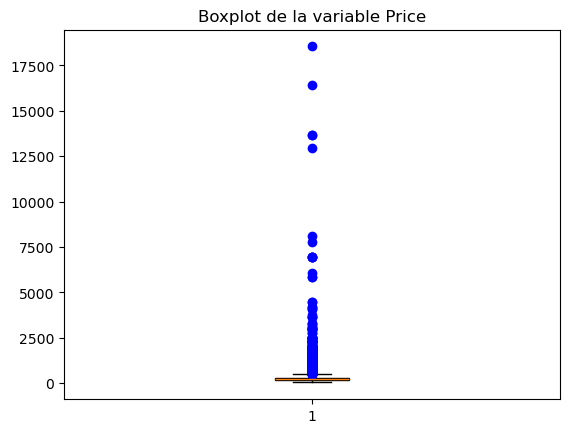

In [10]:
plt.boxplot(df['Price'], patch_artist=True, sym='b')
plt.title('Boxplot de la variable Price')
plt.show()

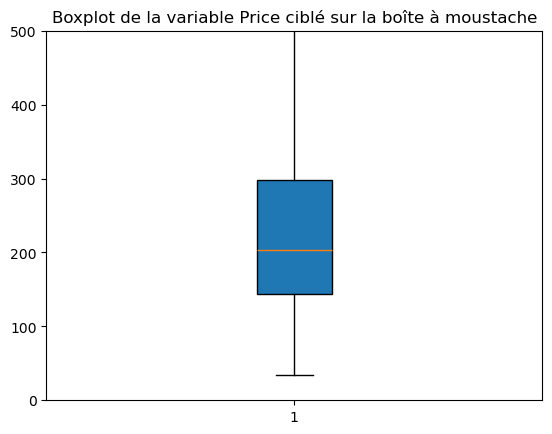

In [11]:
plt.boxplot(df['Price'], patch_artist=True, sym='b')
plt.ylim(0,500)
plt.title('Boxplot de la variable Price ciblé sur la boîte à moustache')
plt.show()

Nous allons nous concentrer sur les annonces dont le prix est inférieur à 1000€ :

In [12]:
df = df[df["Price"] <= 1000].reset_index(drop=True)

**Q3. Dresser un boxplot de la variable `Price` dans cette configuration. Quel est le prix moyen sur l'ensemble des logements ?**

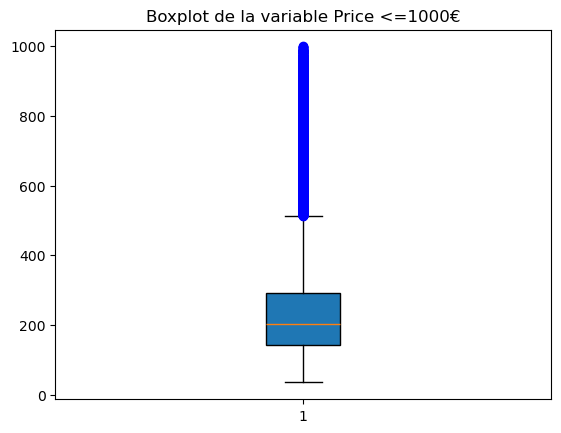

In [13]:
plt.boxplot(df['Price'], patch_artist=True, sym='b')
plt.title('Boxplot de la variable Price <=1000€')
plt.show()

Le prix moyen est de 243€ la nuit

In [14]:
df.describe()

,Price,Person Capacity,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km)
count,41238.000000,41238.000000,41238.000000,41238.000000,41238.000000,41238.000000
mean,243.450953,3.225253,93.082206,1.155124,2.683718,0.605125
std,149.035838,1.295029,8.148662,0.626559,2.000259,0.708277
min,34.779339,2.000000,20.000000,0.000000,0.015059,0.002301
25%,143.365839,2.000000,90.000000,1.000000,1.277552,0.237076
50%,202.480974,3.000000,95.000000,1.000000,2.259660,0.392317
75%,291.499674,4.000000,98.000000,1.000000,3.587169,0.679472
max,999.226677,6.000000,100.000000,10.000000,25.284557,14.273577


**Q4. Quelles sont les villes les plus représentées dans le dataset ?**

Les villes les plus représentées sont Rome avec environ 9000 logements suivi de Paris avec environ 6500 logements puis Lisbonne avec environ 5700 logements

In [15]:
df['City'].value_counts()

City
Rome         9004
Paris        6504
Lisbon       5760
Athens       5277
Budapest     4015
Vienna       3534
Barcelona    2802
Berlin       2467
Amsterdam    1875
Name: count, dtype: int64

Dans la suite, nous conserverons uniquement les annonces issues des quatre villes les plus représentées :

In [16]:
cities = df["City"].value_counts().head(4).index.tolist()
df = df[df["City"].isin(cities)].reset_index(drop=True)

## Exploratory Data Analysis (EDA)

**Q5. Analyser la distribution globale des prix avec un histogramme.**

c:\Users\phounsavath\Anaconda_V2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


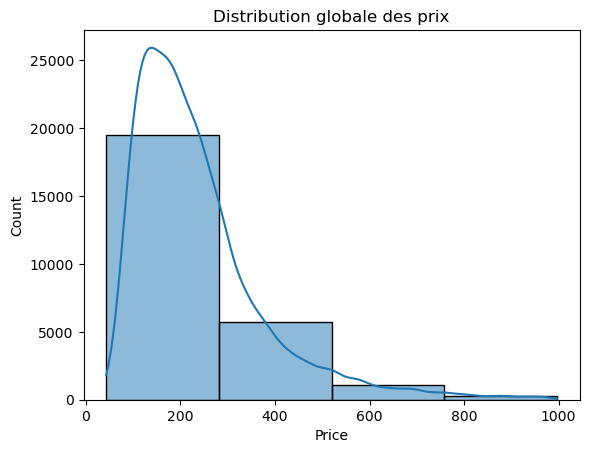

In [17]:
sns.histplot(df['Price'], kde=True, bins=4)
plt.title('Distribution globale des prix')
plt.show()

**Q6. Analyser la distribution des variables `Person Capacity`, `Guest Satisfaction` et `City Center (km)`.**

c:\Users\phounsavath\Anaconda_V2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


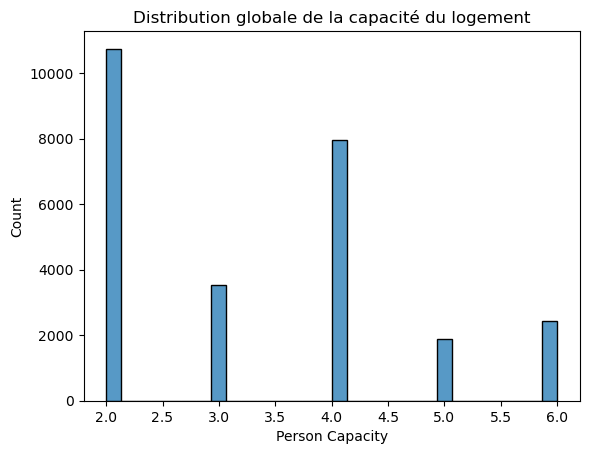

In [18]:
sns.histplot(df['Person Capacity'])
plt.title('Distribution globale de la capacité du logement')
plt.show()

c:\Users\phounsavath\Anaconda_V2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


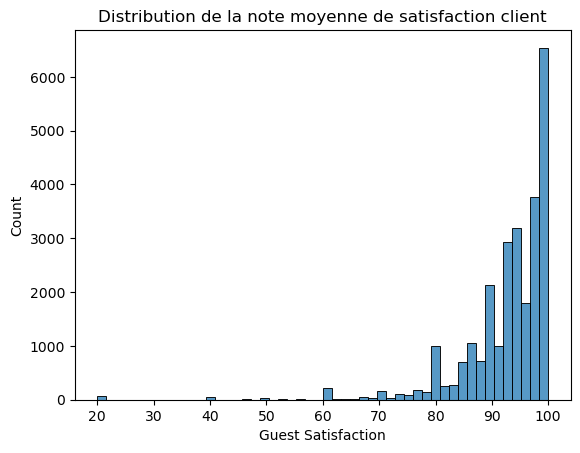

In [19]:
sns.histplot(df['Guest Satisfaction'], bins=50)
plt.title('Distribution de la note moyenne de satisfaction client')
plt.show()

c:\Users\phounsavath\Anaconda_V2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


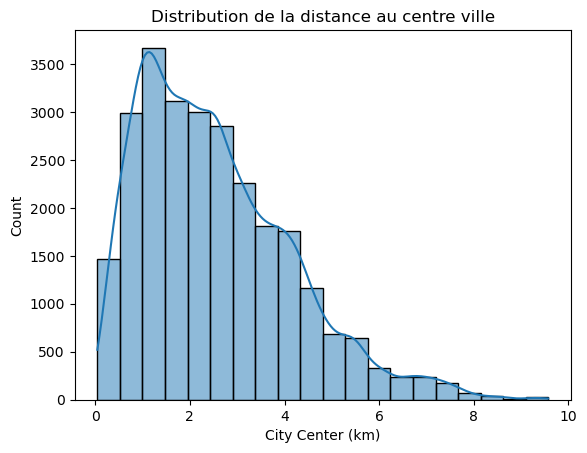

In [20]:
sns.histplot(df['City Center (km)'], kde=True, bins=20)
plt.title('Distribution de la distance au centre ville')
plt.show()

**Q7. Analyser les prix pour chaque ville. Laquelle semble afficher les prix les plus hauts ?**

La ville de Paris possède les prix les plus élevés avec un prix max de 996€ la nuit

In [21]:
df.sort_values(by='Price', ascending= False).head(10)

,City,Price,Day,Room Type,Person Capacity,Superhost,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km)
15063,Paris,996.831019,Weekend,Entire home/apt,2.0,True,100.0,1,4.978036,0.364365
16099,Paris,996.831019,Weekend,Entire home/apt,6.0,True,98.0,3,1.583502,0.103468
12794,Paris,996.831019,Weekday,Entire home/apt,6.0,True,98.0,3,1.583504,0.103487
16797,Paris,994.267872,Weekend,Entire home/apt,4.0,True,99.0,2,5.277955,0.319425
14748,Paris,988.675552,Weekend,Entire home/apt,6.0,False,83.0,2,0.596897,0.418275
9233,Lisbon,987.101313,Weekend,Entire home/apt,6.0,False,100.0,2,0.511440,0.304982
11388,Paris,987.044459,Weekday,Entire home/apt,6.0,False,100.0,2,3.068565,0.328720
15262,Paris,985.180352,Weekend,Entire home/apt,5.0,False,90.0,2,3.869819,0.308192
12091,Paris,985.180352,Weekday,Entire home/apt,5.0,False,90.0,2,3.869829,0.308204
14537,Paris,984.714326,Weekend,Entire home/apt,6.0,False,100.0,2,0.738180,0.196288


*Pour la question suivante, nous sélectionnons les annonces concernant la location d'un logement avec 3 chambres, le week-end à Athènes :*

In [22]:
df_athens_weekend_b3 = df[(df["City"] == "Athens") & (df["Day"] == "Weekend") & (df["Bedrooms"] == 3)]

**Q8. Analyser la relation entre le prix d'un logement et son éloignement par rapport au centre de la ville à partir des données de `df_athens_weekend_b3`.**

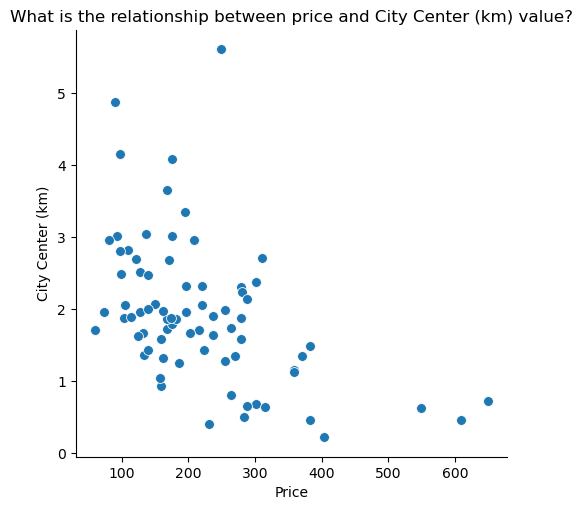

In [23]:
sns.relplot(data=df_athens_weekend_b3, x='Price', y='City Center (km)', s=50, kind = 'scatter')
plt.title('What is the relationship between price and City Center (km) value?') 
plt.show()

c:\Users\phounsavath\Anaconda_V2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\phounsavath\Anaconda_V2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


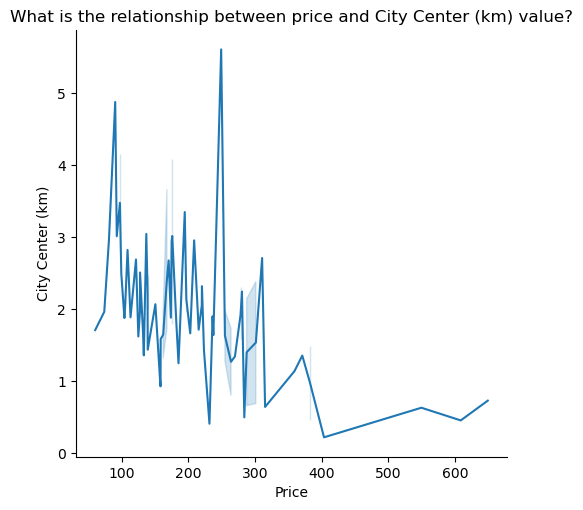

In [24]:
sns.relplot(data=df_athens_weekend_b3, x='Price', y='City Center (km)',  kind = 'line')
plt.title('What is the relationship between price and City Center (km) value?') 
plt.show()

c:\Users\phounsavath\Anaconda_V2\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


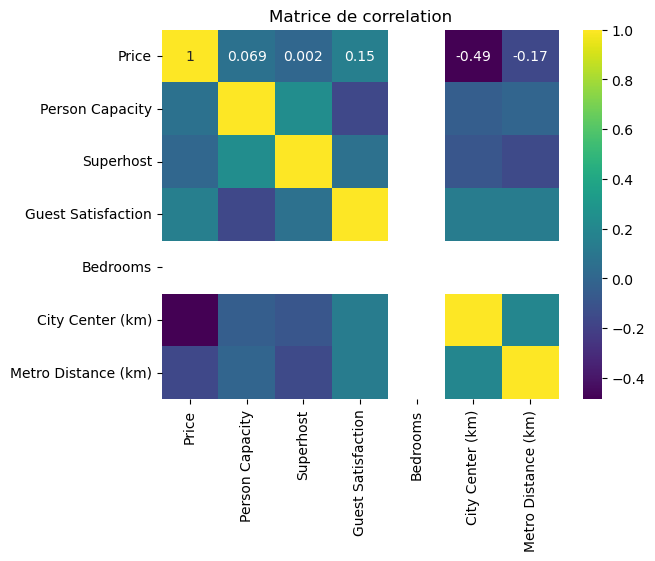

In [25]:
sns.heatmap(df_athens_weekend_b3.corr(numeric_only=True), annot=True, cmap= sns.color_palette("viridis", as_cmap=True))
plt.title('Matrice de correlation')
plt.show()

Nous pouvons remarquer que plus les logements sont proches du centre ville, plus les prix vont être élevés entre 400 et +600€. Cependant, il est possible de trouver des logements autour de 250€-300€ à moins de 1km du centre ville.
Les logements qui avoisinent le prix à la nuitée autour de 100€ seront essentiellement éloignés du centre ville (entre 4 et 5km)

*Nous reprenons désormais le DataFrame `df`.*

**Q9. Analyser l'influence de la variable `Room Type` sur le prix d'un logement.**

Les logements "entier" possèdent les prix les plus élevés (prix max env 260€) suivi de la chambre privative (prix max env 170€) puis du logement partagé (prix max env 130€)

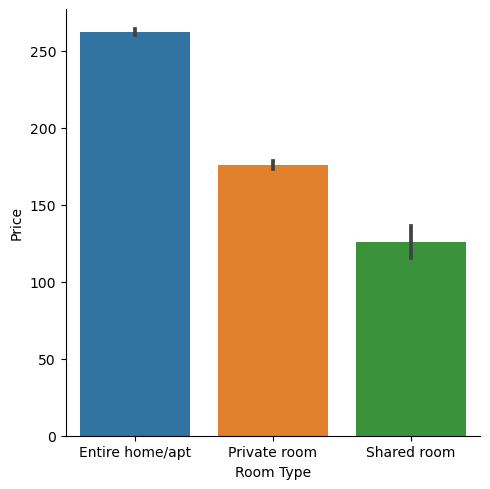

In [26]:
sns.catplot(data=df, x='Room Type', y='Price', kind='bar')
plt.show()

## Normalisation et encodage des variables

**Q10. Convertir les variables `Superhost`, `Day`, `City` et `Room Type` avec une méthode appropriée.**

df_base est le df avant one hot encoding soit 10 colonnes, 26545 lignes

In [27]:
df_base = df.copy()


In [28]:
df_base.head()

,City,Price,Day,Room Type,Person Capacity,Superhost,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km)
0,Athens,129.824479,Weekday,Entire home/apt,4.0,False,100.0,2,2.813964,0.881890
1,Athens,138.963748,Weekday,Entire home/apt,4.0,True,96.0,1,0.407293,0.304568
2,Athens,156.304923,Weekday,Entire home/apt,3.0,True,98.0,1,1.237211,0.288488
3,Athens,91.627024,Weekday,Entire home/apt,4.0,True,99.0,1,4.367457,0.297467
4,Athens,74.051508,Weekday,Private room,2.0,False,100.0,1,2.194185,0.385266


In [29]:
ohe_superhost_categ = pd.get_dummies(df["Superhost"], prefix="categ_Superhost")
df = pd.concat([df, ohe_superhost_categ], axis=1)

In [30]:
ohe_day_categ = pd.get_dummies(df["Day"], prefix="categ_day")
df = pd.concat([df, ohe_day_categ], axis=1)

In [31]:
ohe_city_categ = pd.get_dummies(df["City"], prefix="categ_city")
df = pd.concat([df, ohe_city_categ], axis=1)

In [32]:
ohe_room_categ = pd.get_dummies(df["Room Type"], prefix="categ_room")
df = pd.concat([df, ohe_room_categ ], axis=1)

In [33]:
df.columns

Index(['City', 'Price', 'Day', 'Room Type', 'Person Capacity', 'Superhost',
       'Guest Satisfaction', 'Bedrooms', 'City Center (km)',
       'Metro Distance (km)', 'categ_Superhost_False', 'categ_Superhost_True',
       'categ_day_Weekday', 'categ_day_Weekend', 'categ_city_Athens',
       'categ_city_Lisbon', 'categ_city_Paris', 'categ_city_Rome',
       'categ_room_Entire home/apt', 'categ_room_Private room',
       'categ_room_Shared room'],
      dtype='object')

df_ohe est le df avec one hot encoding avant la normalisation des données

In [34]:
df_ohe = df.copy()
df_ohe.shape

(26545, 21)

**Q11. Analyser les ordres de grandeur des différentes variables numériques (sauf le prix). Appliquer un traitement si nécessaire.**

In [35]:
df.select_dtypes(include="number").drop(columns='Price').columns

Index(['Person Capacity', 'Guest Satisfaction', 'Bedrooms', 'City Center (km)',
       'Metro Distance (km)'],
      dtype='object')

In [36]:
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include="number").drop(columns='Price').columns
df_num = df.copy()
df_num = df_num[num_cols]
df[num_cols] = scaler.fit_transform(df_num.values)

df.head()

,City,Price,Day,Room Type,Person Capacity,Superhost,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),...,categ_Superhost_True,categ_day_Weekday,categ_day_Weekend,categ_city_Athens,categ_city_Lisbon,categ_city_Paris,categ_city_Rome,categ_room_Entire home/apt,categ_room_Private room,categ_room_Shared room
0,Athens,129.824479,Weekday,Entire home/apt,0.50,False,1.0000,0.2,0.290733,0.142606,...,False,True,False,True,False,False,False,True,False,False
1,Athens,138.963748,Weekday,Entire home/apt,0.50,True,0.9500,0.1,0.038241,0.048908,...,True,True,False,True,False,False,False,True,False,False
2,Athens,156.304923,Weekday,Entire home/apt,0.25,True,0.9750,0.1,0.125311,0.046298,...,True,True,False,True,False,False,False,True,False,False
3,Athens,91.627024,Weekday,Entire home/apt,0.50,True,0.9875,0.1,0.453715,0.047756,...,True,True,False,True,False,False,False,True,False,False
4,Athens,74.051508,Weekday,Private room,0.00,False,1.0000,0.1,0.225710,0.062005,...,False,True,False,True,False,False,False,False,True,False


la colonne Price n'a pas été normalisé car c'est notre variable cible

In [37]:
cols_to_drop = ['City', 'Day', 'Room Type','Superhost']
df = df.drop(columns=cols_to_drop)
df.head()

,Price,Person Capacity,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),categ_Superhost_False,categ_Superhost_True,categ_day_Weekday,categ_day_Weekend,categ_city_Athens,categ_city_Lisbon,categ_city_Paris,categ_city_Rome,categ_room_Entire home/apt,categ_room_Private room,categ_room_Shared room
0,129.824479,0.50,1.0000,0.2,0.290733,0.142606,True,False,True,False,True,False,False,False,True,False,False
1,138.963748,0.50,0.9500,0.1,0.038241,0.048908,False,True,True,False,True,False,False,False,True,False,False
2,156.304923,0.25,0.9750,0.1,0.125311,0.046298,False,True,True,False,True,False,False,False,True,False,False
3,91.627024,0.50,0.9875,0.1,0.453715,0.047756,False,True,True,False,True,False,False,False,True,False,False
4,74.051508,0.00,1.0000,0.1,0.225710,0.062005,True,False,True,False,True,False,False,False,False,True,False


In [38]:
df.shape

(26545, 17)

## Création du train et du test set

**Q12. Séparer les données en données d'entraînement et en données de test.**

*On réservera par exemple 20% des données pour le test.*

*Stocker ces données dans des variables `X_train`, `X_test`, `y_train` et `y_test`*

In [39]:
X = df.drop("Price", axis=1)
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [40]:
print(f"Train shape : {X_train.shape}")
print(f"Test shape : {X_test.shape}")

Train shape : (21236, 16)
Test shape : (5309, 16)


In [41]:
y_train = y_train.to_frame()
y_test = y_test.to_frame()
y_test.head()

,Price
8398,188.320826
24711,150.328478
9989,170.028143
16490,211.110075
26195,205.971057


In [42]:
print(f"Y Train shape : {y_train.shape}")
print(f"Y Test shape : {y_test.shape}")

Y Train shape : (21236, 1)
Y Test shape : (5309, 1)


In [43]:
X_test.head()

,Person Capacity,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),categ_Superhost_False,categ_Superhost_True,categ_day_Weekday,categ_day_Weekend,categ_city_Athens,categ_city_Lisbon,categ_city_Paris,categ_city_Rome,categ_room_Entire home/apt,categ_room_Private room,categ_room_Shared room
8398,0.50,0.8250,0.2,0.582399,0.067302,True,False,False,True,False,True,False,False,True,False,False
24711,0.50,0.9625,0.1,0.225588,0.025836,False,True,False,True,False,False,False,True,True,False,False
9989,0.25,0.9000,0.1,0.117159,0.105517,True,False,False,True,False,True,False,False,True,False,False
16490,0.00,0.9000,0.1,0.551539,0.029112,True,False,False,True,False,False,True,False,True,False,False
26195,0.00,0.9375,0.1,0.251125,0.032640,True,False,False,True,False,False,False,True,True,False,False


**Q13. Les données sont-elles en nombre suffisant pour implémenter une régression linéaire ? Un arbre de décision ?**

Le dataset d'entrainement possède 21236 ligne et il sera possible de le tester sur 5309 lignes. C'est suffisant pour tenter une régression linéaire et/ou arbre de décision

## Régression linéaire

**Q14. Implémenter une régression linéaire pour prédire le prix d'une annonce en fonction de toutes les autres variables sur les données d'entraînement et commenter les performances du modèle.**

In [44]:
lin_reg = LinearRegression()
lin_reg = lin_reg.fit(X_train, y_train)

In [45]:
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

In [62]:
score_train = r2_score(y_train, y_pred_train)
score_test = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)


In [63]:
print('Pente:', lin_reg.coef_)
print("Ordonnée à l'origine : ", lin_reg.intercept_)

print(f"Le R2 de la base train est de {score_train:.1%}!")
print(f"Le R2 de la base test est de {score_test:.1%}!")

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)



Pente: [[ 1.15298739e+02  5.38671026e+01  2.71016256e+02 -1.58270576e+02
   6.11374151e+01  1.97211726e+14  1.97211726e+14  2.14072451e+12
   2.14072451e+12  1.58240246e+14  1.58240246e+14  1.58240246e+14
   1.58240246e+14  1.69998824e+15  1.69998824e+15  1.69998824e+15]]
Ordonnée à l'origine :  [-2.05758094e+15]
Le R2 de la base train est de 51.8%!
Le R2 de la base test est de 49.8%!
Mean Absolute Error: 67.87631452347962
Mean Squared Error: 9858.304719065263


Avec la régression linéaire le R2 score est de 51%, le modèle n'est pas assez satisfaisant pour être déployé

In [50]:
# on affiche les coefficients avec les features associées

for feat, coef in zip(X.columns, lin_reg.coef_):
    print(feat, coef)

Person Capacity [ 1.15298739e+02  5.38671026e+01  2.71016256e+02 -1.58270576e+02
  6.11374151e+01  1.97211726e+14  1.97211726e+14  2.14072451e+12
  2.14072451e+12  1.58240246e+14  1.58240246e+14  1.58240246e+14
  1.58240246e+14  1.69998824e+15  1.69998824e+15  1.69998824e+15]


Affichage des variables importantes avec une fonction

In [51]:
def feature_importance(model, X_train):
    """
    Plots a feature importance graph for regressions (linear, logistic, regularizations...)
    or random forest models.
    
    Args:
        model: trained model
        X_train: the training dataframe, to extract variable names
    """
    
    try:
        try:
            importance = model.coef_[0]
            test_error = importance[0]
        except:
            importance = model.coef_

        importances = []
        for i, v in enumerate(importance):
            importances.append((X_train.columns[i], v))
        importances.sort(key=lambda tup: abs(tup[1]), reverse=True)
    
        feature_names = [x[0] for x in importances]
        importances = [x[1] for x in importances]
        
    
    except:
        try:
            ordering = np.argsort(model.feature_importances_)[::-1]#[:50]
            importances = model.feature_importances_[ordering]

            X_columns = X_train.columns
            feature_names = X_columns[ordering]
        
        except:
            print('The function can only plot feature importance for regression or RF models.')
        
    ticks = np.arange(len(importances))
    fig, ax = plt.subplots(figsize=(10,3))
    ax = sns.barplot(y=importances, x=ticks, palette=sns.diverging_palette(150, 10, center="dark", n=len(importances)))
    plt.xticks(ticks, feature_names, rotation=90)
    plt.show()

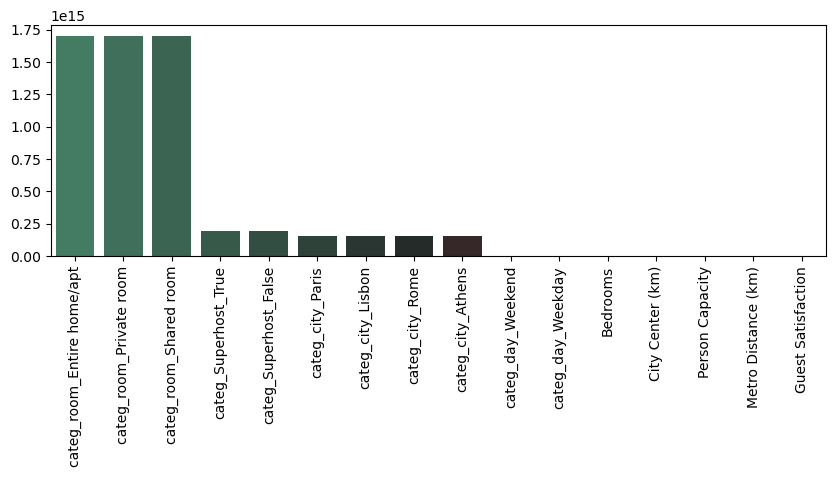

In [52]:
feature_importance(lin_reg, X_train)

Nous pouvons remarquer que les variables sur le Room Type influent le plus sur le prix suivi du superhost puis la ville de Paris puis Lisbonne

## Régression linéraire avec Statsmodels

In [53]:
df_base.head()

,City,Price,Day,Room Type,Person Capacity,Superhost,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km)
0,Athens,129.824479,Weekday,Entire home/apt,4.0,False,100.0,2,2.813964,0.881890
1,Athens,138.963748,Weekday,Entire home/apt,4.0,True,96.0,1,0.407293,0.304568
2,Athens,156.304923,Weekday,Entire home/apt,3.0,True,98.0,1,1.237211,0.288488
3,Athens,91.627024,Weekday,Entire home/apt,4.0,True,99.0,1,4.367457,0.297467
4,Athens,74.051508,Weekday,Private room,2.0,False,100.0,1,2.194185,0.385266


In [54]:
df_base_norm = df_base.copy()

In [55]:
scaler = MinMaxScaler()
num_cols = df_base_norm.select_dtypes(include="number").drop(columns='Price').columns
df_num = df_base_norm.copy()
df_num = df_num[num_cols]
df[num_cols] = scaler.fit_transform(df_num.values)

df_base_norm.head()

,City,Price,Day,Room Type,Person Capacity,Superhost,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km)
0,Athens,129.824479,Weekday,Entire home/apt,4.0,False,100.0,2,2.813964,0.881890
1,Athens,138.963748,Weekday,Entire home/apt,4.0,True,96.0,1,0.407293,0.304568
2,Athens,156.304923,Weekday,Entire home/apt,3.0,True,98.0,1,1.237211,0.288488
3,Athens,91.627024,Weekday,Entire home/apt,4.0,True,99.0,1,4.367457,0.297467
4,Athens,74.051508,Weekday,Private room,2.0,False,100.0,1,2.194185,0.385266


In [56]:
df_base_norm.columns

Index(['City', 'Price', 'Day', 'Room Type', 'Person Capacity', 'Superhost',
       'Guest Satisfaction', 'Bedrooms', 'City Center (km)',
       'Metro Distance (km)'],
      dtype='object')

In [57]:
df_base_norm.columns = ['City', 'Price', 'Day', 'RoomType', 'PersonCapacity', 'Superhost',
       'GuestSatisfaction', 'Bedrooms', 'CityCenter_km',
       'MetroDistance_km']

In [58]:
import statsmodels.formula.api as smf
model_2 = smf.ols('Price ~ City + PersonCapacity + GuestSatisfaction + Bedrooms + CityCenter_km + MetroDistance_km + Superhost + Day + RoomType', data=df_base_norm).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     2342.
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        22:02:49   Log-Likelihood:            -1.5944e+05
No. Observations:               26545   AIC:                         3.189e+05
Df Residuals:                   26532   BIC:                         3.190e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## Arbre de régression

**Q15. Implémenter un arbre de régression, sans préciser d'hyperparamètre.**

*L'implémentation se fait de la même manière que pour un arbre de décision classique, mais en utilisant la classe `DecisionTreeRegressor` du module `sklearn.tree`.*

In [59]:
clf_tree = DecisionTreeRegressor()

In [60]:
clf_tree.fit(X_train, y_train)

DecisionTreeRegressor()

**Q16. Afficher les trois premières couches de l'arbre. Quelles semblent être les variables les plus importantes dans le processus de décision ?**

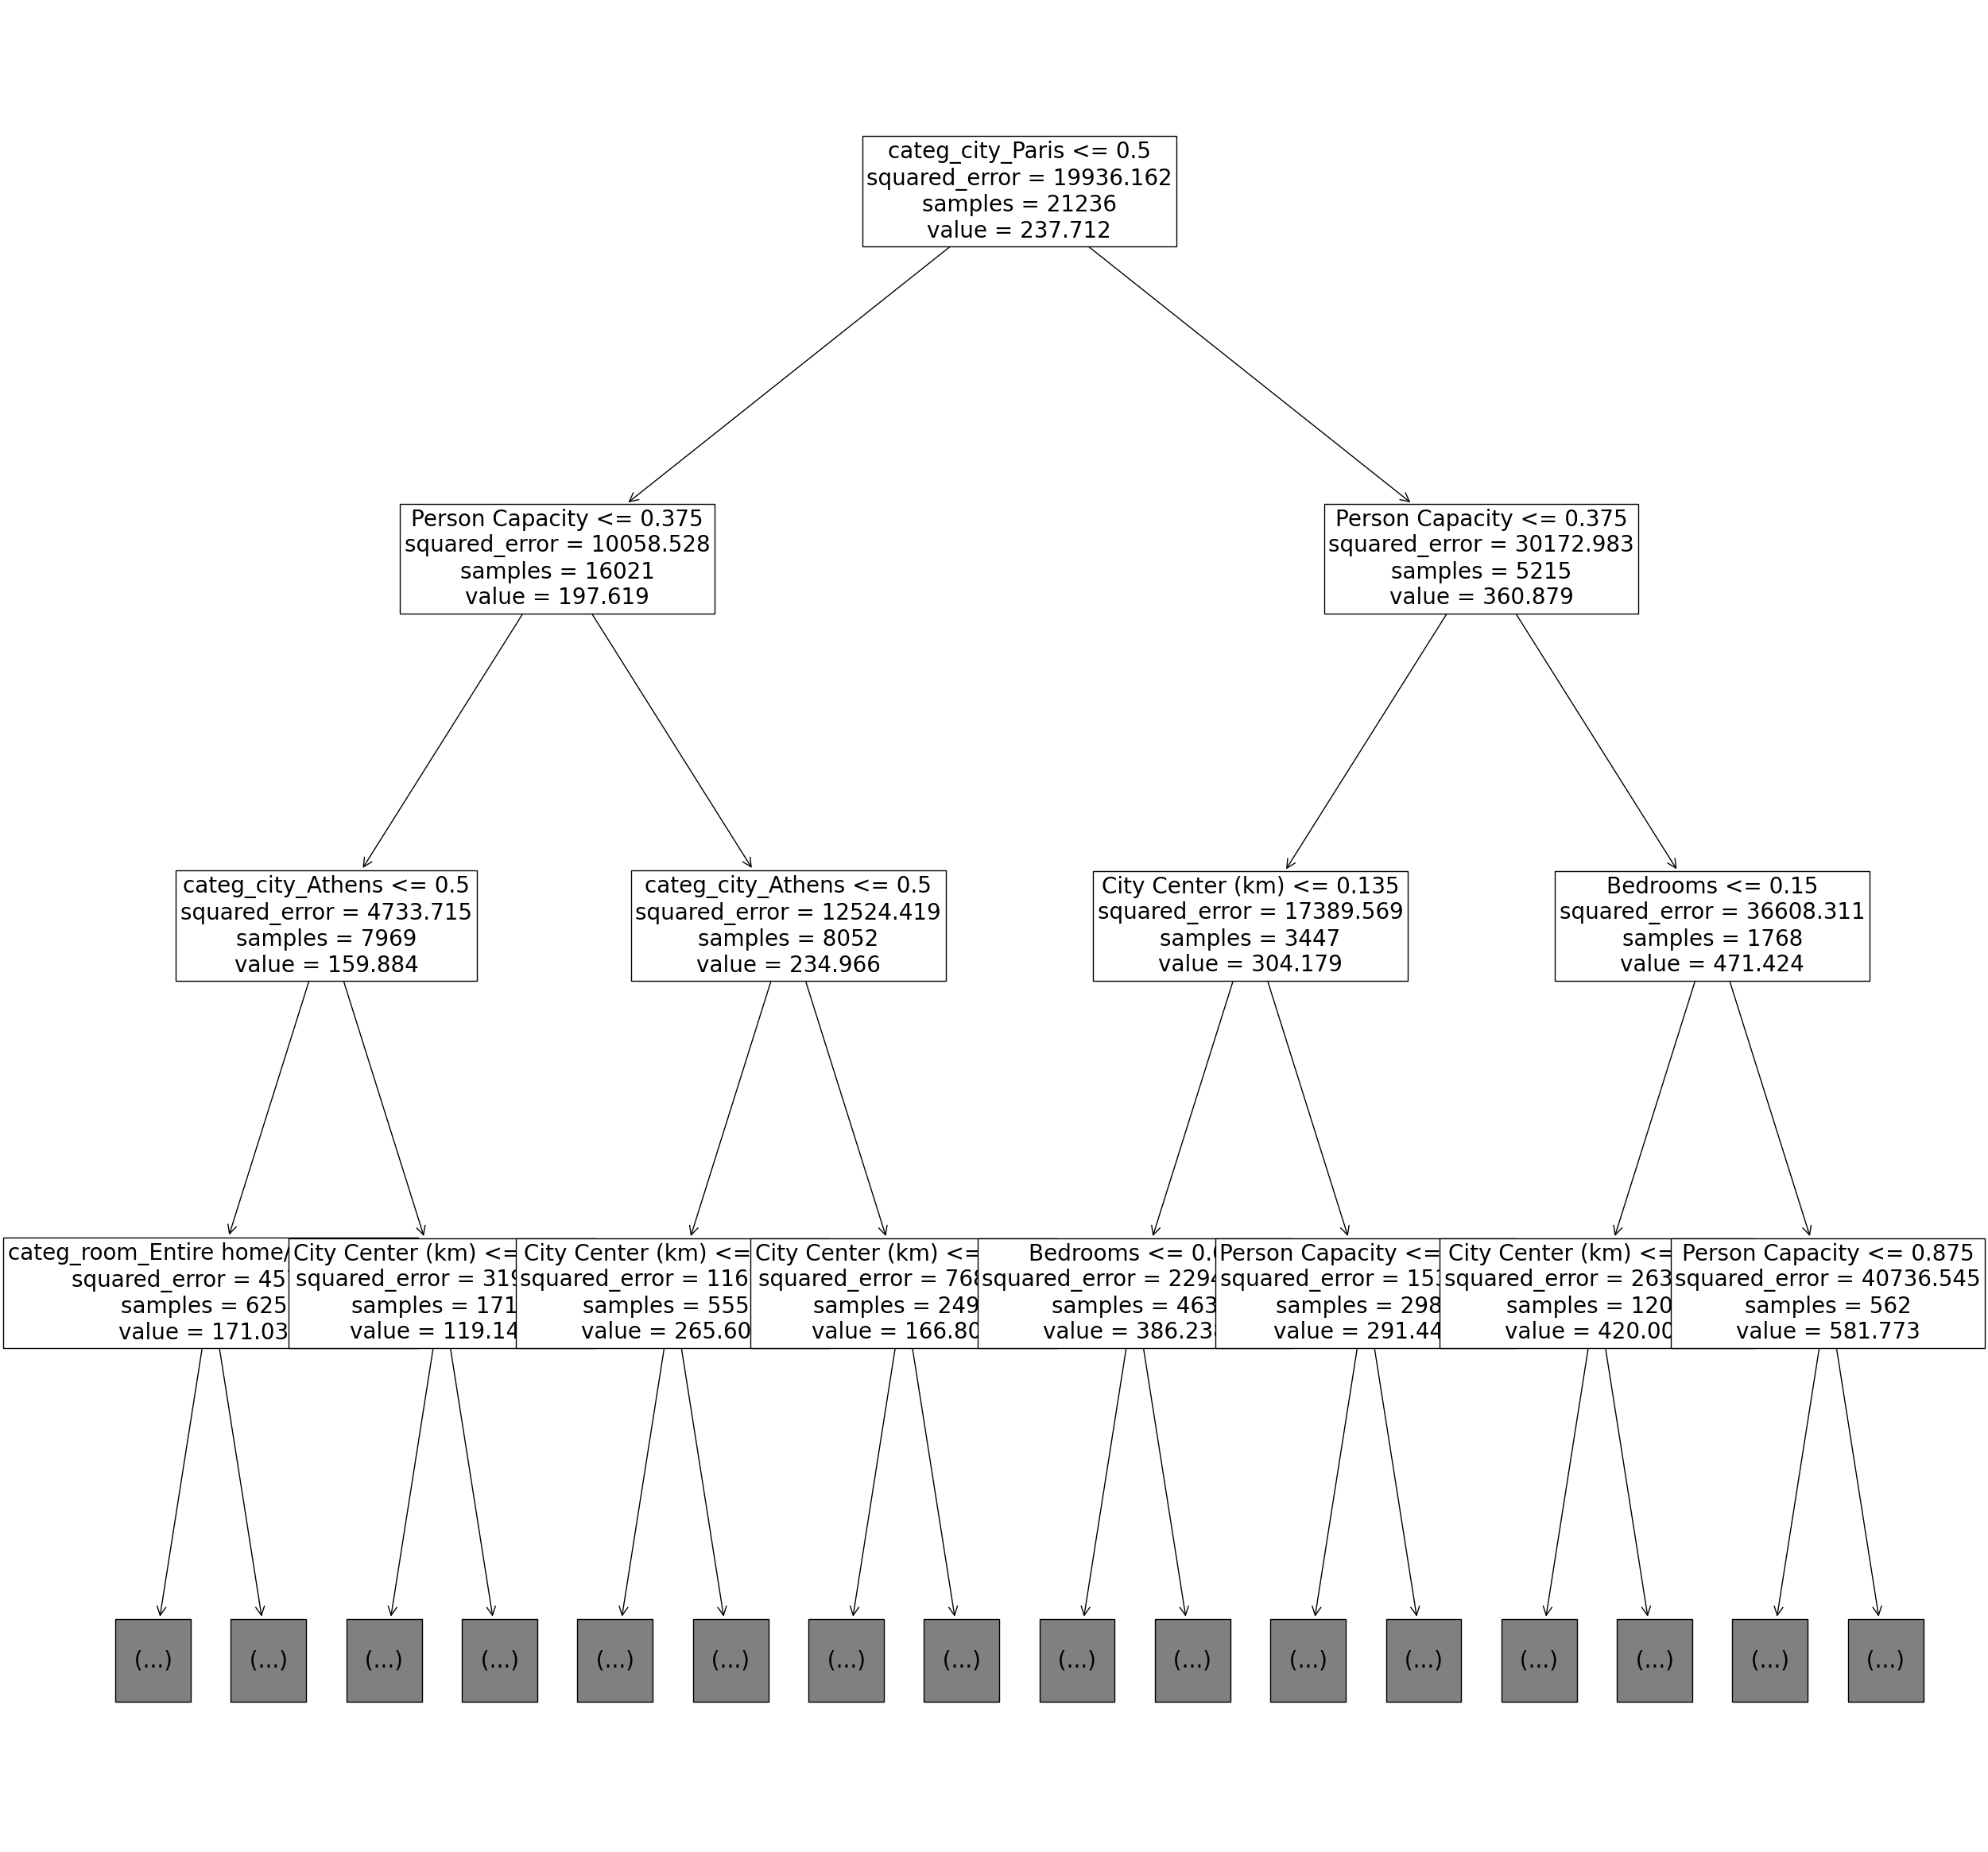

In [61]:
plt.figure(figsize=(30,30))
plot_tree(clf_tree, feature_names=X.columns, max_depth=3, fontsize=20)
plt.show()

Nous pouvons remarquer que la ville de Paris influe bcp sur le prix puis la capacité d'hébergement.
Il y a aussi la distance au centre ville, le nb de chambre.

Visualisation de la prédiction sur le data set de test

In [62]:
y_pred = clf_tree.predict(X_test)
y_pred

array([263.83677298, 133.49542936, 198.87429644, ..., 109.90556089,
        97.48552949, 382.37487184])

Analysons la matrice de confusion:

In [378]:
# ConfusionMatrixDisplay.from_predictions()

**Q17. Comparer les performances de ce modèle par rapport à celles de la régression linéaire précédente.**

In [63]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_mse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-Mean Squared Error:", r_mse)
print("R-squared:", r2)

Mean Absolute Error: 41.212493209001835
Mean Squared Error: 6889.209486731249
R-Mean Squared Error: 83.00126195866693
R-squared: 0.649285274192155


Avec l'arbre de régression, la R squared est passé de 49% à 65% donc une meilleur performance du modèle

In [293]:
df_y_pred = pd.DataFrame(y_pred)
df_y_pred.columns = ['Price decision tree']
df_y_pred.head()

,Price decision tree
0,263.602251
1,133.495429
2,198.874296
3,161.245223
4,228.181329


Résultat de la prédiction du prix avec le modèle de régression linéaire

In [298]:
df_y_pred_test = pd.DataFrame(y_pred_test)
df_y_pred_test.columns = ['Price lin reg']
df_y_pred_test.head()

,Price lin reg
0,226.50
1,249.25
2,250.75
3,311.75
4,179.25


Comparaisons de la valeur cible "Price" sur les différents modèles

In [531]:
df_price = pd.concat([y_test, df_y_pred, df_y_pred_test], axis=1 )
df_price.dropna(inplace=True)
df_price.sample(20)

,Price,Price decision tree,Price lin reg
2201,236.449277,240.338531,249.00
3315,82.722096,428.842594,258.75
1450,126.543716,261.491557,291.00
2090,170.599677,211.772983,312.50
4285,127.715417,601.407401,270.75
3780,177.395543,162.397769,107.00
411,116.935767,792.478330,417.25
4296,119.513510,144.934290,145.25
3634,133.339582,92.114184,148.25
1833,108.968200,299.721787,226.50


**Q18. Reprendre le modèle précédent en choisissant `max_depth=15`. Quelle est la conséquence de la modification précédente sur les performances du modèle ?**

In [64]:
clf_tree_15 = DecisionTreeRegressor(max_depth=15)

In [65]:
clf_tree_15.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15)

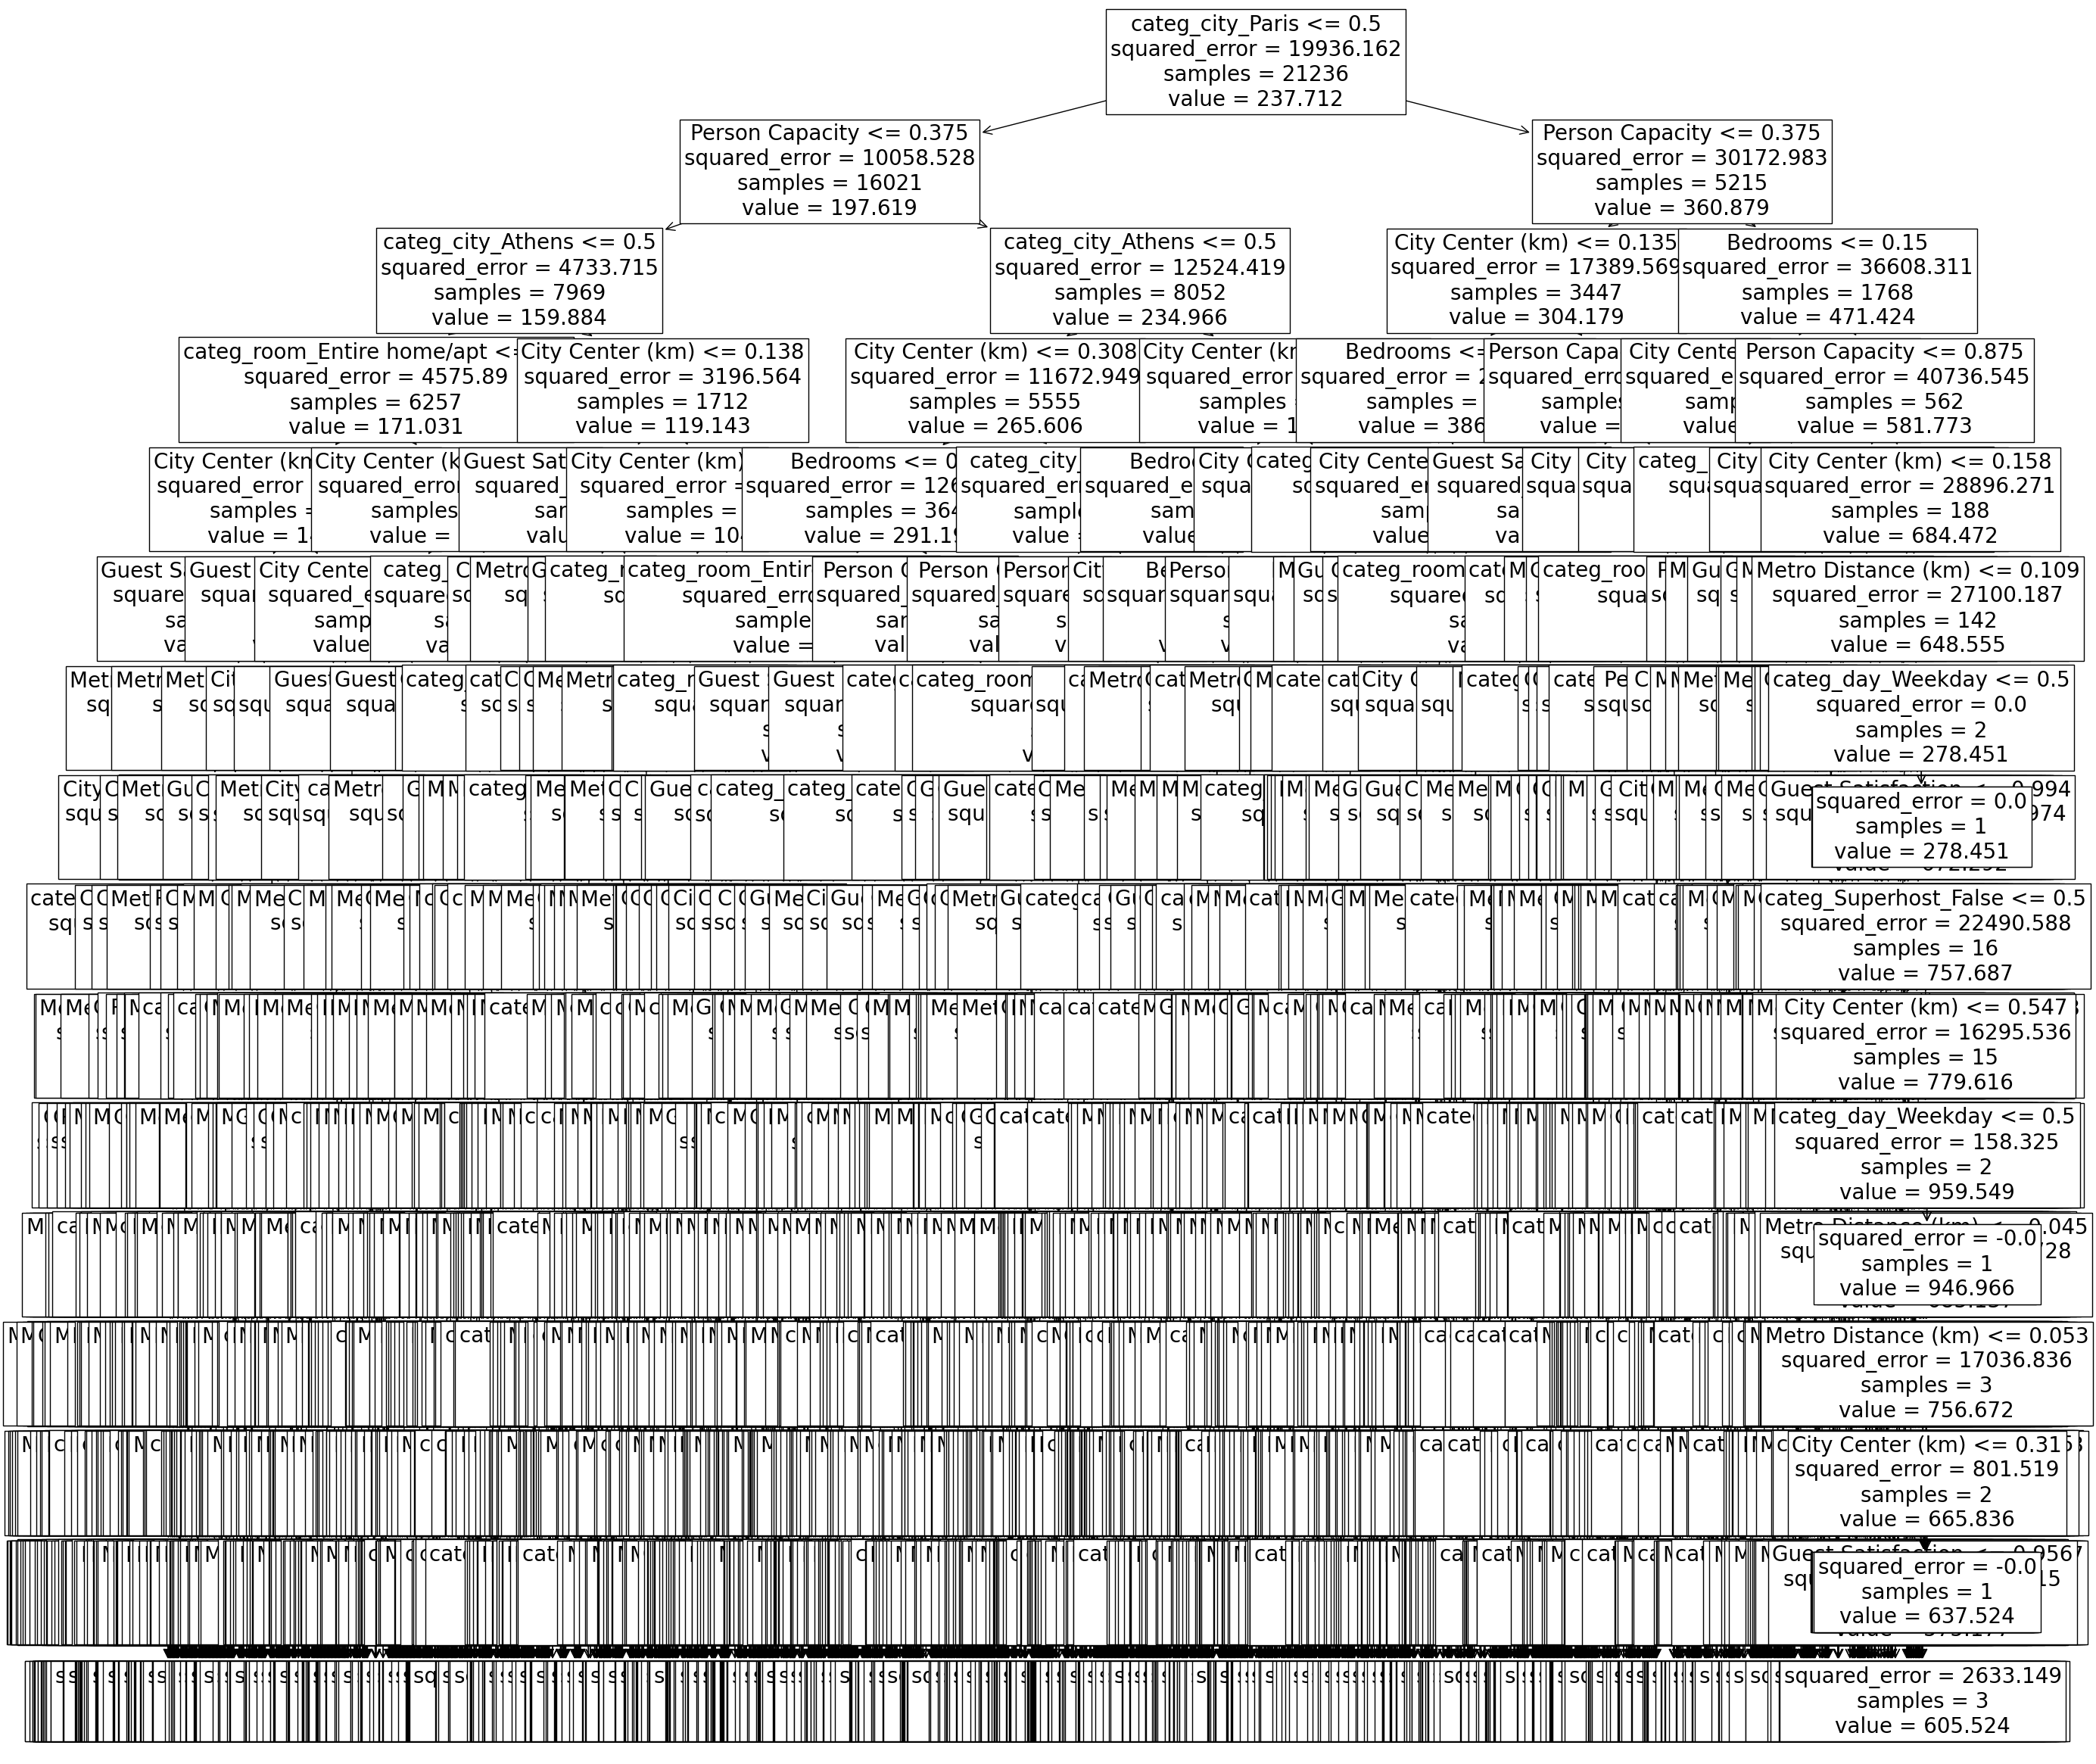

In [549]:
plt.figure(figsize=(30,30))
plot_tree(clf_tree_15, feature_names=X.columns,fontsize=20)
plt.show()

## Random Forest Regressor

**Q19. Implémenter une Random Forest avec la classe `RandomForestRegressor` sans préciser d'hyperparamètres. Quel effet constatez-vous sur les performances du modèle ?**

In [66]:
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

C:\Users\phounsavath\AppData\Local\Temp\ipykernel_40076\3053324243.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf.fit(X_train, y_train)


In [67]:
pd.DataFrame(clf_rf.feature_importances_,
              index = X_train.columns, 
              columns = ["importance"]).sort_values(
     "importance", 
     ascending = False)

,importance
categ_city_Paris,0.247595
City Center (km),0.205629
Person Capacity,0.164023
Metro Distance (km),0.137532
Guest Satisfaction,0.068380
Bedrooms,0.056055
categ_city_Athens,0.048923
categ_room_Entire home/apt,0.028836
categ_room_Shared room,0.007468
categ_Superhost_False,0.006225


In [68]:
mae_clf = mean_absolute_error(y_test, y_pred_rf)
mse_clf = mean_squared_error(y_test, y_pred_rf)
r2_clf = r2_score(y_test, y_pred_rf)
r_mse_clf = mean_squared_error(y_test, y_pred_rf, squared=False)

print("Mean Absolute Error:", mae_clf)
print("Mean Squared Error:", mse_clf)
print("R-Mean Squared Error:", r_mse_clf)
print("R-squared:", r2_clf)

Mean Absolute Error: 42.01043147361894
Mean Squared Error: 4712.137103413672
R-Mean Squared Error: 68.6450078550048
R-squared: 0.7601153114336747


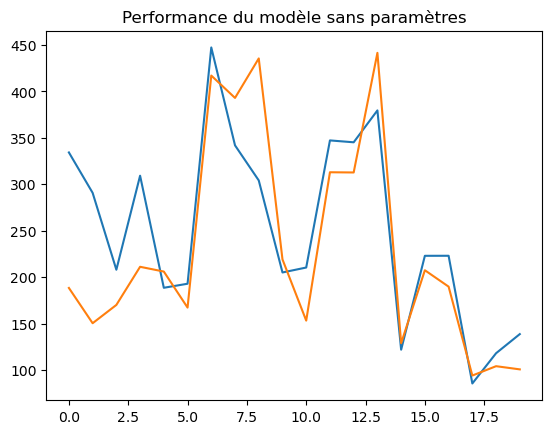

In [69]:
plt.title('Performance du modèle sans paramètres')
plt.plot(list(y_pred_rf)[:20])
plt.plot(y_test.values[:20])
plt.show()

**Q20. Implémenter une méthode permettant d'optimiser les valeurs des hyperparamètres `n_estimators` et `max_depth`.**

Le code ci-dessous pour obtenir un modèle optimisé avait été utilisé lors de mon projet final Data Analyst chez Databird

In [384]:
# Modèle de forêt aléatoire initial
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Importance des caractéristiques
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Sélection des caractéristiques les plus importantes
sfm = SelectFromModel(rf_model, threshold=0.01)
sfm.fit(X_train, y_train)

X_train_important = sfm.transform(X_train)
X_test_important = sfm.transform(X_test)

# Nouvelle recherche de grille avec les caractéristiques importantes
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_important, y_train)
print("Best parameters found:", grid_search.best_params_)

# Modèle avec les meilleurs paramètres
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test_important)
r_mse_best = mean_squared_error(y_test, y_pred_best, squared=False)
r2_best = r2_score(y_test, y_pred_best)
print(f"Best Model - RMean Squared Error (R-MSE): {r_mse_best}")
print(f"Best Model - R-squared (R2): {r2_best}")



C:\Users\phounsavath\AppData\Local\Temp\ipykernel_34308\1300266802.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
c:\Users\phounsavath\Anaconda_V2\Lib\site-packages\sklearn\feature_selection\_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Fitting 5 folds for each of 180 candidates, totalling 900 fits


c:\Users\phounsavath\Anaconda_V2\Lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Best Model - RMean Squared Error (R-MSE): 67.85128519637557
Best Model - R-squared (R2): 0.7656306762698595


In [399]:
mae_rf = mean_absolute_error(y_test, y_pred_best)
mse_rf = mean_squared_error(y_test, y_pred_best)

print("Best parameters found:", grid_search.best_params_)
print(f"Best Model - Mean Absolute Error: {mae_rf}")
print(f"Best Model - Mean Squared Error: {mse_rf}") # erreur quadratique moyenne
print(f"Best Model - R-Mean Squared Error (R-MSE): {r_mse_best}") # racine de l'erreur quadratique moyenne
print(f"Best Model - R-squared (R2): {r2_best}")

Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Best Model - Mean Absolute Error: 40.126121552053924
Best Model - Mean Squared Error: 4603.796902799894
Best Model - R-Mean Squared Error (R-MSE): 67.85128519637557
Best Model - R-squared (R2): 0.7656306762698595


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


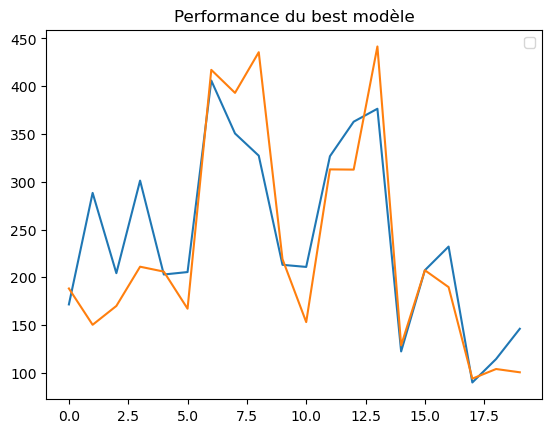

In [420]:
plt.title('Performance du best modèle')
plt.plot(list(y_pred_best)[:20])
plt.plot(y_test.values[:20])
plt.legend()

In [393]:
pd.DataFrame(rf_model.feature_importances_,
              index = X_train.columns, 
              columns = ["importance"]).sort_values(
     "importance", 
     ascending = False)

,importance
categ_city_Paris,0.248143
City Center (km),0.205355
Person Capacity,0.164770
Metro Distance (km),0.137356
Guest Satisfaction,0.068484
Bedrooms,0.055074
categ_city_Athens,0.048692
categ_room_Entire home/apt,0.029001
categ_room_Shared room,0.007551
categ_Superhost_False,0.006079


In [429]:
df_rf = df.copy()

In [431]:
# Appliquer le modèle optimisé au dataset de base
df_rf['Predictions'] = best_rf_model.predict(sfm.transform(df_rf[X.columns]))
print(df_rf[['Price', 'Predictions']])

            Price  Predictions
0      129.824479   130.822768
1      138.963748   140.946852
2      156.304923   173.776158
3       91.627024    95.949429
4       74.051508    78.136058
...           ...          ...
26540  413.812452   358.894542
26541  582.376733   478.680979
26542  878.591635   827.113483
26543  447.244757   389.867838
26544  265.821897   250.112427

[26545 rows x 2 columns]


In [520]:
pct_erreur = (r_mse_best / df_rf['Price'].mean()*100).round(2)
pct_erreur_clf = (r_mse_clf / df_rf['Price'].mean()*100).round(2)
pct_erreur_tree = (r_mse / df_rf['Price'].mean()*100).round(2)

print(f"Le pourcentage d'erreur du modèle Random Forest avec paramètres est de : {pct_erreur} %")
print(f"Le pourcentage d'erreur du modèle Random Forest sans paramètres est de : {pct_erreur_clf} %")
print(f"Le pourcentage d'erreur de l'arbre de régression est de : {pct_erreur_tree} %")

Le pourcentage d'erreur du modèle Random Forest avec paramètres est de : 28.53 %
Le pourcentage d'erreur du modèle Random Forest sans paramètres est de : 29.1 %
Le pourcentage d'erreur de l'arbre de régression est de : 34.87 %


In [561]:
df_rf = df_rf[['Price', 'Predictions']]
df_rf['ecart Price'] = df_rf['Predictions'] - df_rf['Price']
df_rf.sample(10).style.background_gradient(subset=['ecart Price'])

,Price,Predictions,ecart Price
6519,271.810507,263.726064,-8.084443
24253,93.750731,96.426294,2.675563
16750,158.216050,180.413230,22.197180
930,142.478851,136.741616,-5.737234
2801,112.483303,132.276850,19.793546
575,236.449277,231.275045,-5.174232
14631,295.227887,318.413878,23.185991
12126,579.504148,516.290544,-63.213603
4265,452.042275,250.958451,-201.083823
3745,110.139901,135.623228,25.483327


In [571]:
df_rf.sample(10).style.background_gradient(subset=['ecart Price'])

,Price,Predictions,ecart Price
23184,176.279429,183.648545,7.369116
12994,233.013328,249.050471,16.037142
23413,161.550511,152.983949,-8.566562
21303,115.259626,120.339486,5.079859
13356,330.179886,333.447219,3.267332
5146,119.279169,119.323108,0.043939
20710,138.405069,127.898656,-10.506413
21149,92.114184,95.776334,3.662149
2927,162.397769,168.375202,5.977433
17116,347.888899,314.206823,-33.682077


In [534]:
df_prix = df_rf.copy()
df_price

,Price,Price decision tree,Price lin reg
423,93.970426,297.138837,210.75
3023,133.339582,298.956100,324.75
2973,127.715417,265.120520,268.25
2214,138.963748,364.014682,329.00
1103,122.794273,216.725504,266.75
...,...,...,...
2090,170.599677,211.772983,312.50
290,133.339582,293.855535,354.75
4235,109.202540,99.594591,121.75
4031,140.369789,259.509504,256.75


In [547]:
df_price = pd.concat([df_price, df_rf], axis=1)
df_price.dropna(inplace=True)

In [553]:
df_price.columns = ['Price', 'Price decision tree', 'Price lin reg', 'Price Random Forest', 'Predictions1', 'Predictions2', 'Predictions3', 'Price2', 'Predictions4', 'ecart Price']

In [559]:
df_price.drop(columns=['Predictions1', 'Predictions2', 'Predictions3', 'Price2', 'Predictions4', 'ecart Price'], inplace=True)

Table de la valeur cible 'Price' selon les différents modèles: Régression linéaire, Arbre de régression, Random Forest Regressor

In [560]:
df_price

,Price,Price decision tree,Price lin reg,Price Random Forest
423,93.970426,297.138837,210.75,89.956764
3023,133.339582,298.956100,324.75,145.382326
2973,127.715417,265.120520,268.25,119.135050
2214,138.963748,364.014682,329.00,207.621915
1103,122.794273,216.725504,266.75,138.131840
...,...,...,...,...
2090,170.599677,211.772983,312.50,158.962927
290,133.339582,293.855535,354.75,137.644412
4235,109.202540,99.594591,121.75,148.372507
4031,140.369789,259.509504,256.75,127.623439


**Q21. Au total, combien d'arbres ont dû être générés lors de la phase d'optimisation précédente ?**

Ici, nous testons 5 nombre d'arbres différents, 4 profondeurs d'arbres et 3 valeurs de nombre minimal de points par feuille.

Fitting 5 folds for each of 180 candidates, totalling 900 fits = (5*(4*3))*3)*5

**Q22. Quel modèle présente les meilleures performances ? Etait-ce attendu ?**

Le meilleur modèle est le random Forest Regressor avec les hyperparamètres indiqués par le Best parameters found

In [456]:
print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}


**Q23. Un propriétaire souhaite proposer son logement sur Airbnb. L'annonce fait mention des caractéristiques suivantes. Quel prix peut-il espérer en tirer ?**

`{'City': 'Lisbon',
'Day': 'Weekend',
'Room Type': 'Entire home/apt',
'Person Capacity': 4,
'Superhost': False,
'Guest Satisfaction': 95,
'Bedrooms': 2,
'City Center (km)': 1.75,
'Metro Distance (km)': 0.2}`

*Indication : créer un DataFrame constitué d'une ligne à partir des données ci-dessus puis appliquer les étapes de pre-processing nécessaire avant d'effectuer la prédiction.*

In [70]:
dic2 = {'City': 'Lisbon',
'Day': 'Weekend',
'Room Type': 'Entire home/apt',
'Person Capacity': 4,
'Superhost': False,
'Guest Satisfaction': 95,
'Bedrooms': 2,
'City Center (km)': 1.75,
'Metro Distance (km)': 0.2}

df_pred = pd.DataFrame([dic2])
df_pred

,City,Day,Room Type,Person Capacity,Superhost,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km)
0,Lisbon,Weekend,Entire home/apt,4,False,95,2,1.75,0.2


In [71]:
df_pred_linreg = df_pred.copy()

df_pred_linreg.columns = ['City','Day', 'RoomType', 'PersonCapacity', 'Superhost',
       'GuestSatisfaction', 'Bedrooms', 'CityCenter_km',
       'MetroDistance_km']

Price_Lisbon = model_2.predict(df_pred_linreg)
print(f'Avec la régression linéaire, la location de ce logement en Airbnb pourrait être de {list(Price_Lisbon)[0]} €')

Avec la régression linéaire, la location de ce logement en Airbnb pourrait être de 294.59025035373946 €


In [498]:
dic_3 = {'Price': 0,
'Person Capacity': 4,
'Guest Satisfaction': 95,
'Bedrooms': 2,
'City Center (km)': 1.75,
'Metro Distance (km)': 0.2,
'categ_Superhost_False': True,
'categ_Superhost_True' : False,
'categ_day_Weekday' : False,
'categ_day_Weekend': True,
'categ_city_Athens': False,
'categ_city_Lisbon': True,
'categ_city_Paris': False,
'categ_city_Rome': False,
'categ_room_Entire home/apt': True,
'categ_room_Private room': False,
'categ_room_Shared room': False}

df_best_model = pd.DataFrame([dic_3])
df_best_model

,Price,Person Capacity,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),categ_Superhost_False,categ_Superhost_True,categ_day_Weekday,categ_day_Weekend,categ_city_Athens,categ_city_Lisbon,categ_city_Paris,categ_city_Rome,categ_room_Entire home/apt,categ_room_Private room,categ_room_Shared room
0,0,4,95,2,1.75,0.2,True,False,False,True,False,True,False,False,True,False,False


In [572]:
df_best_model['Prediction_price'] = best_rf_model.predict(sfm.transform(df_best_model[X.columns]))
best_Price_Lisbon = df_best_model['Prediction_price']
print(f'Avec le modèle de Random Forest, le prix de cette location sur Airbnb serait de {list(best_Price_Lisbon)[0]} €')

Avec le modèle de Random Forest, le prix de cette location sur Airbnb serait de 322.8766245662063 €
